In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import warnings

warnings.filterwarnings('ignore')

# Ajouter src au path
sys.path.insert(0, str(Path.cwd().parent))

from src.preprocessing import (
    load_application_data,
    create_application_features,
    build_full_dataset,
    prepare_train_test_data,
    CreditScoringPreprocessor
)

print("✅ Imports effectués")
print("📁 DATA_DIR résolu automatiquement par le module preprocessing")

✅ Imports effectués


## 1. Chargement des Données

In [2]:
# Charger les données principales
train_df, test_df = load_application_data()

print(f"\n📊 Données chargées:")
print(f"   Train: {train_df.shape}")
print(f"   Test: {test_df.shape}")

✅ Données chargées: train=(307511, 122), test=(48744, 121)

📊 Données chargées:
   Train: (307511, 122)
   Test: (48744, 121)


In [3]:
# Distribution de la target
print("\n📊 Distribution TARGET:")
print(train_df['TARGET'].value_counts())
print(f"\nTaux de défaut: {train_df['TARGET'].mean()*100:.2f}%")


📊 Distribution TARGET:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Taux de défaut: 8.07%


## 2. Feature Engineering - Application

In [4]:
# Créer les features dérivées
train_fe = create_application_features(train_df.copy())
test_fe = create_application_features(test_df.copy())

# Nouvelles colonnes créées
new_cols = [c for c in train_fe.columns if c not in train_df.columns]
print(f"\n📊 {len(new_cols)} nouvelles features créées:")
for col in new_cols:
    print(f"   - {col}")


📊 14 nouvelles features créées:
   - CREDIT_INCOME_RATIO
   - ANNUITY_INCOME_RATIO
   - CREDIT_GOODS_RATIO
   - INCOME_PER_PERSON
   - ANNUITY_LENGTH
   - AGE_YEARS
   - EMPLOYED_YEARS
   - EMPLOYED_TO_AGE_RATIO
   - EXT_SOURCE_MEAN
   - EXT_SOURCE_STD
   - EXT_SOURCE_MIN
   - EXT_SOURCE_MAX
   - DOCUMENTS_COUNT
   - CONTACTS_COUNT


In [5]:
# Analyser les nouvelles features
train_fe[new_cols].describe()

,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,CREDIT_GOODS_RATIO,INCOME_PER_PERSON,ANNUITY_LENGTH,AGE_YEARS,EMPLOYED_YEARS,EMPLOYED_TO_AGE_RATIO,EXT_SOURCE_MEAN,EXT_SOURCE_STD,EXT_SOURCE_MIN,EXT_SOURCE_MAX,DOCUMENTS_COUNT,CONTACTS_COUNT
count,307511.000000,307499.000000,307233.000000,3.075090e+05,307499.000000,307511.000000,307511.000000,307511.000000,307339.000000,2.706020e+05,3.073390e+05,307339.000000,307511.000000,307511.000000
mean,3.957537,0.180928,1.122992,5.748225e+04,21.611295,43.936973,-174.835742,-2.871851,0.509251,1.512456e-01,3.995821e-01,0.615882,0.930155,3.355174
std,2.689696,0.094573,0.124044,6.585166e+04,7.823599,11.956133,387.056895,6.511765,0.149802,9.991074e-02,1.874246e-01,0.156130,0.344295,0.865288
min,0.004808,0.000224,0.150000,2.647059e+03,8.036227,20.517808,-1000.665753,-45.338009,0.000006,3.538459e-07,8.173617e-08,0.000006,0.000000,1.000000
25%,2.018659,0.114781,0.999999,3.375000e+04,15.614247,34.008219,0.791781,0.020981,0.413648,7.238552e-02,2.539628e-01,0.540654,1.000000,3.000000
50%,3.265042,0.162832,1.118798,4.950000e+04,19.999259,43.150685,3.323288,0.086318,0.524502,1.360209e-01,4.031671e-01,0.648470,1.000000,3.000000
75%,5.159857,0.229064,1.197998,6.750000e+04,27.099077,53.923288,7.561644,0.186063,0.622819,2.143878e-01,5.530128e-01,0.725276,1.000000,4.000000
max,84.733539,1.875892,5.999867,2.925000e+07,45.301400,69.120548,49.073973,0.718146,0.878903,6.519439e-01,8.789034e-01,0.962693,4.000000,6.000000


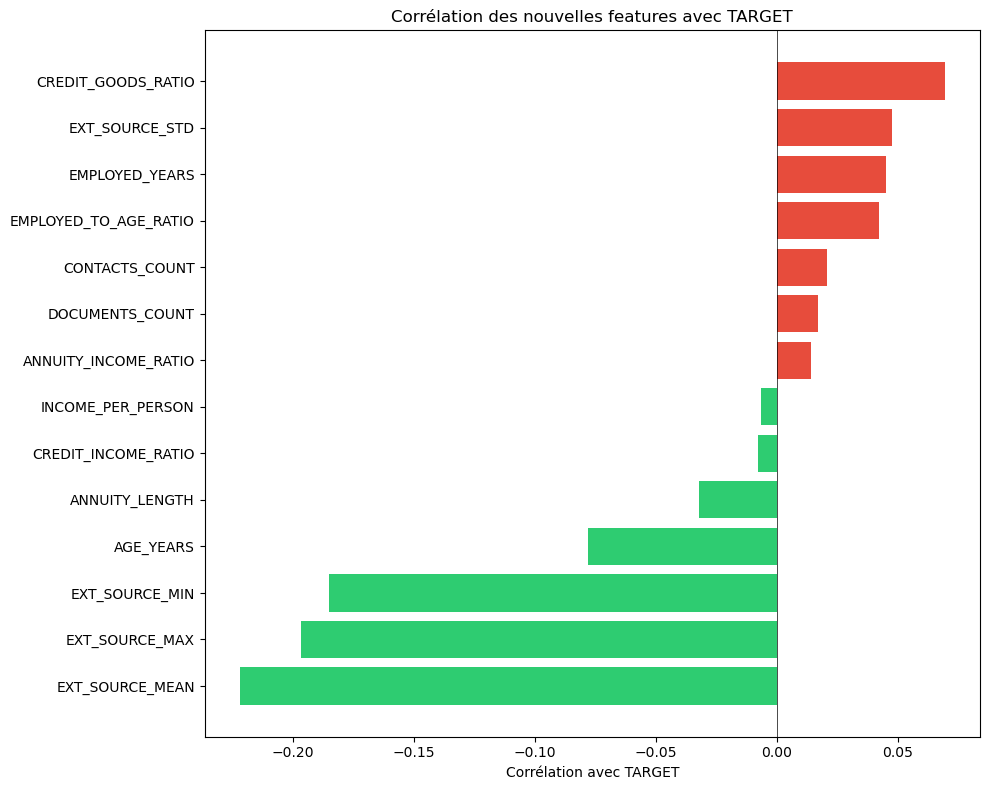

In [6]:
# Corrélation des nouvelles features avec TARGET
correlations = train_fe[new_cols + ['TARGET']].corr()['TARGET'].drop('TARGET').sort_values()

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#e74c3c' if c > 0 else '#2ecc71' for c in correlations.values]
ax.barh(range(len(correlations)), correlations.values, color=colors)
ax.set_yticks(range(len(correlations)))
ax.set_yticklabels(correlations.index)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xlabel('Corrélation avec TARGET')
ax.set_title('Corrélation des nouvelles features avec TARGET')
plt.tight_layout()
plt.savefig('../reports/new_features_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Agrégation des Tables Auxiliaires

In [7]:
# Construire le dataset complet avec toutes les tables
# Utiliser un échantillon pour la démo (plus rapide)
train_full, test_full = build_full_dataset(
    include_supplementary=True,
    sample_frac=0.1  # 10% pour la démo
)

print(f"\n📊 Dataset final:")
print(f"   Train: {train_full.shape}")
print(f"   Test: {test_full.shape}")
print(f"   Nombre de features: {train_full.shape[1] - 2}")

📊 Construction du dataset complet...
✅ Données chargées: train=(307511, 122), test=(48744, 121)
   ⚡ Échantillonnage: 10.0%
   🔧 Feature engineering application...
   📁 Agrégation bureau...
   📁 Agrégation previous_application...
   📁 Agrégation installments...
   📁 Agrégation POS_CASH...
   📁 Agrégation credit_card...
✅ Dataset construit: train=(30751, 246), test=(4874, 245)

📊 Dataset final:
   Train: (30751, 246)
   Test: (4874, 245)
   Nombre de features: 244


In [8]:
# Examiner les features agrégées
agg_cols = [c for c in train_full.columns if any(prefix in c for prefix in ['BUREAU_', 'PREV_', 'INST_', 'POS_', 'CC_'])]
print(f"\n📊 {len(agg_cols)} features agrégées des tables auxiliaires")
print(f"\nExemples:")
for prefix in ['BUREAU_', 'PREV_', 'INST_', 'POS_', 'CC_']:
    cols = [c for c in agg_cols if c.startswith(prefix)]
    print(f"   {prefix[:-1]}: {len(cols)} features")


📊 116 features agrégées des tables auxiliaires

Exemples:
   BUREAU: 41 features
   PREV: 27 features
   INST: 12 features
   POS: 14 features
   CC: 16 features


## 4. Pipeline de Prétraitement

In [9]:
# Créer et fitter le préprocesseur
preprocessor = CreditScoringPreprocessor(
    impute_strategy='median',
    scale=False,
    drop_high_nan=0.8  # Supprimer les colonnes avec >80% de NaN
)

# Fit sur train
X_train = preprocessor.fit_transform(train_full)
y_train = train_full['TARGET']

# Transform sur test
X_test = preprocessor.transform(test_full)

print(f"\n📊 Données prétraitées:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_train: {y_train.shape}")

✅ Préprocesseur fitted: 243 features

📊 Données prétraitées:
   X_train: (30751, 243)
   X_test: (4874, 243)
   y_train: (30751,)


In [10]:
# Vérifier les valeurs manquantes après prétraitement
print(f"\n📊 Valeurs manquantes après prétraitement:")
print(f"   X_train: {np.isnan(X_train).sum()} ({np.isnan(X_train).sum() / X_train.size * 100:.4f}%)")
print(f"   X_test: {np.isnan(X_test).sum()} ({np.isnan(X_test).sum() / X_test.size * 100:.4f}%)")


📊 Valeurs manquantes après prétraitement:
   X_train: 0 (0.0000%)
   X_test: 0 (0.0000%)


In [11]:
# Colonnes supprimées
print(f"\n📊 {len(preprocessor.columns_to_drop)} colonnes supprimées:")
for col in preprocessor.columns_to_drop[:10]:
    print(f"   - {col}")
if len(preprocessor.columns_to_drop) > 10:
    print(f"   ... et {len(preprocessor.columns_to_drop) - 10} autres")


📊 3 colonnes supprimées:
   - CC_AMT_PAYMENT_CURRENT_MEAN
   - SK_ID_CURR
   - TARGET


In [12]:
# Features finales
print(f"\n📊 {len(preprocessor.feature_names)} features finales")
print(f"\nTop 20 features:")
for i, feat in enumerate(preprocessor.feature_names[:20], 1):
    print(f"   {i}. {feat}")


📊 243 features finales

Top 20 features:
   1. NAME_CONTRACT_TYPE
   2. CODE_GENDER
   3. FLAG_OWN_CAR
   4. FLAG_OWN_REALTY
   5. CNT_CHILDREN
   6. AMT_INCOME_TOTAL
   7. AMT_CREDIT
   8. AMT_ANNUITY
   9. AMT_GOODS_PRICE
   10. NAME_TYPE_SUITE
   11. NAME_INCOME_TYPE
   12. NAME_EDUCATION_TYPE
   13. NAME_FAMILY_STATUS
   14. NAME_HOUSING_TYPE
   15. REGION_POPULATION_RELATIVE
   16. DAYS_BIRTH
   17. DAYS_EMPLOYED
   18. DAYS_REGISTRATION
   19. DAYS_ID_PUBLISH
   20. OWN_CAR_AGE


## 5. Sauvegarde du Préprocesseur

In [13]:
# Sauvegarder le préprocesseur
from pathlib import Path

models_dir = Path("../models")
models_dir.mkdir(exist_ok=True)

preprocessor.save(models_dir / "preprocessor.joblib")
print(f"\n✅ Préprocesseur sauvegardé: {models_dir / 'preprocessor.joblib'}")

✅ Préprocesseur sauvegardé: ../models/preprocessor.joblib

✅ Préprocesseur sauvegardé: ../models/preprocessor.joblib


## 6. Fonction Utilitaire Complète

In [14]:
# Utiliser la fonction utilitaire complète
X_train, X_test, y_train, test_ids, preprocessor = prepare_train_test_data(
    include_supplementary=True,
    sample_frac=0.1,
    save_preprocessor=True
)

print(f"\n📊 Données prêtes pour l'entraînement:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_train distribution: {np.bincount(y_train.astype(int))}")

📊 Construction du dataset complet...
✅ Données chargées: train=(307511, 122), test=(48744, 121)
   ⚡ Échantillonnage: 10.0%
   🔧 Feature engineering application...
   📁 Agrégation bureau...
   📁 Agrégation previous_application...
   📁 Agrégation installments...
   📁 Agrégation POS_CASH...
   📁 Agrégation credit_card...
✅ Dataset construit: train=(30751, 246), test=(4874, 245)
✅ Préprocesseur fitted: 243 features
✅ Préprocesseur sauvegardé: /Users/jeffreylepage/Desktop/OPENCLASSROOMS/Lepage_Jeffrey_Réalisez_un_dashboard_et_assurez_une_veille_technique/home-credit-scoring/models/preprocessor.joblib
✅ Données préparées: X_train=(30751, 243), X_test=(4874, 243)

📊 Données prêtes pour l'entraînement:
   X_train: (30751, 243)
   X_test: (4874, 243)
   y_train distribution: [28232  2519]


## Résumé du Pipeline de Prétraitement

### Étapes effectuées:

1. **Chargement des données** (`application_train/test`)

2. **Feature Engineering sur Application:**
   - Ratios financiers (credit/income, annuity/income, etc.)
   - Conversion jours → années (âge, ancienneté emploi)
   - Agrégation des scores externes
   - Comptage des documents/contacts

3. **Agrégation des tables auxiliaires:**
   - Bureau: historique des crédits
   - Previous applications: demandes précédentes
   - Installments: paiements des versements
   - POS_CASH: soldes point de vente
   - Credit card: soldes cartes de crédit

4. **Encodage catégoriel:** LabelEncoder pour les variables objet

5. **Gestion des valeurs manquantes:**
   - Suppression colonnes >80% NaN
   - Imputation médiane pour le reste

6. **Sauvegarde:** Préprocesseur sérialisé pour l'inférence